Import Required Packages and Data 

In [1]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r"EasyVisa.csv")

Show Top 5 Records

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Inspect Shape of the dataset

In [5]:
df.shape

(25480, 12)

Check Datatypes in the dataset

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Summary of the dataset

In [6]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


EXPLORING DATA

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']  # 'O' -->Object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


proportion of count data on categorical columns

In [12]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
------
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name

**Insights**

case_id have unique vlaues for each column which can be dropped as it it of no importance.

continent column is highly biased towards asia. hence we can combine other categories to form a single category.

unit_of_wage seems to be an important column as most of them are yearly contracts.

__Univariate Analysis__

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” 

- The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Other Type of Analysis are**

- Bivariate Analysis: The analysis of two variables.

- Multivariate Analysis: The analysis of two or more variables.

Numerical Features

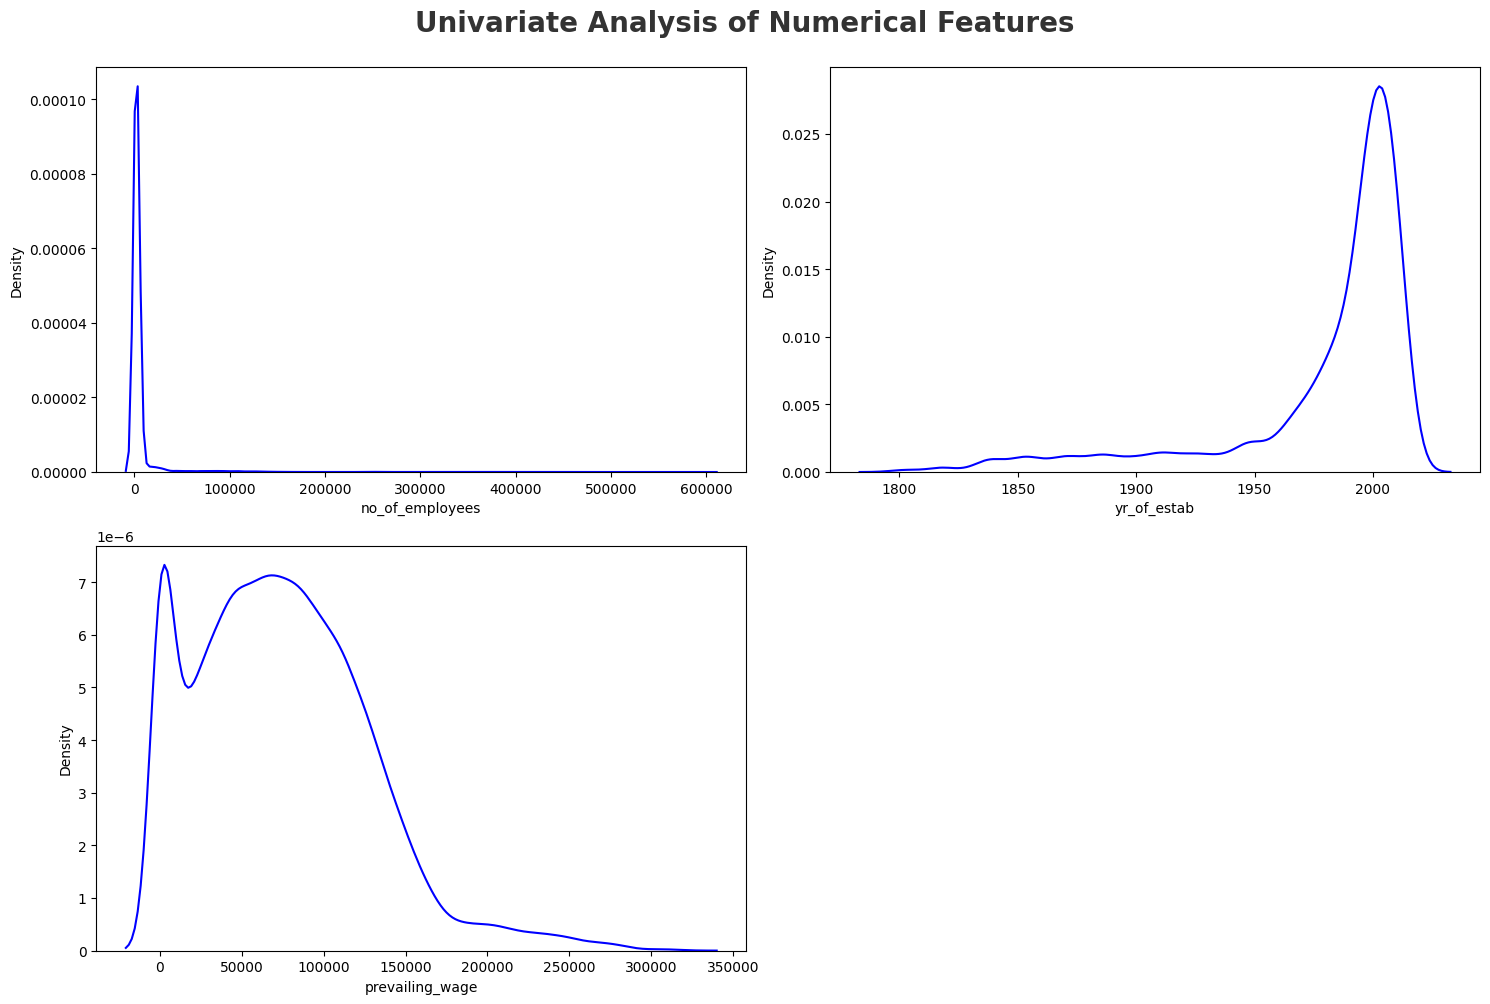

In [13]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**

- no_of_employees column looks more skewed but it may be because of outlies.

- yr_of_estab is a discrete feature.

- privailing-wage is a right-skewed distribution.

<strong>Categorical Features</strong>

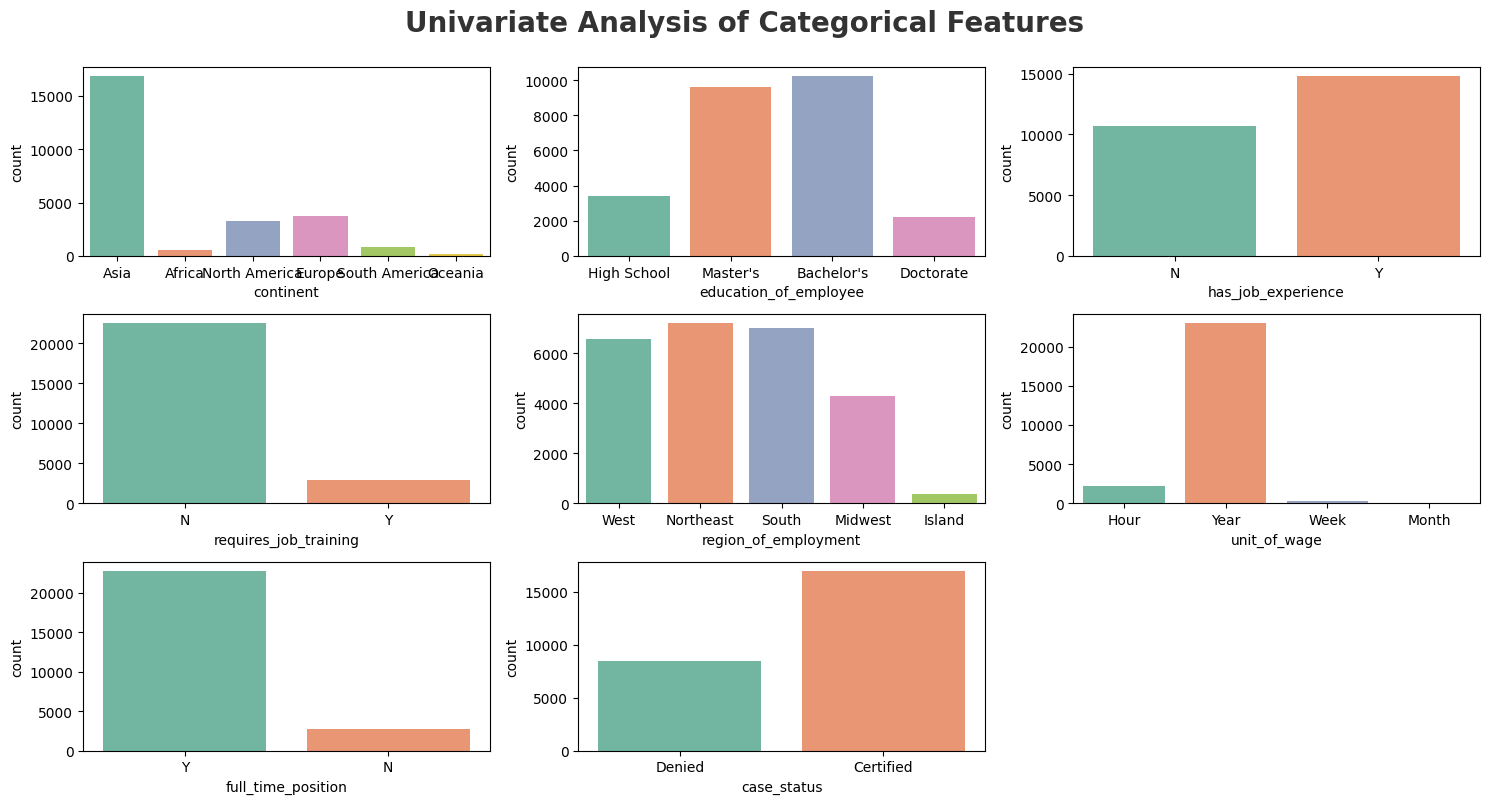

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already removed 'case_id' from categorical_features
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Define a custom color palette (you can choose your own colors)
custom_palette = sns.color_palette("Set2")  # Example: using the Set2 palette

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], palette=custom_palette)  # Specify the palette
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# Optionally, save the plot
# plt.savefig('./images/Univariate_Cat.png')

plt.show()  # Display the plot


**Insights**

requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.

In rest of the columns are balanced.

**Multivariate Analysis**

Multivariate analysis is the analysis of more than one variable.

In [16]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Check Multicollinearity in Numerical features**

In [18]:
df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**Insights**

There is no multicollinearity between any variables

**Check Multicollinearity for Categorical features**

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is 

chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1
): The Feature and Target column are not independent (Correlated)

In [19]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report**

Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

__Checking Null Values__

In [20]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Load continues_features**

In [21]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Analyse Distribution of Numerical Features By Case Status**

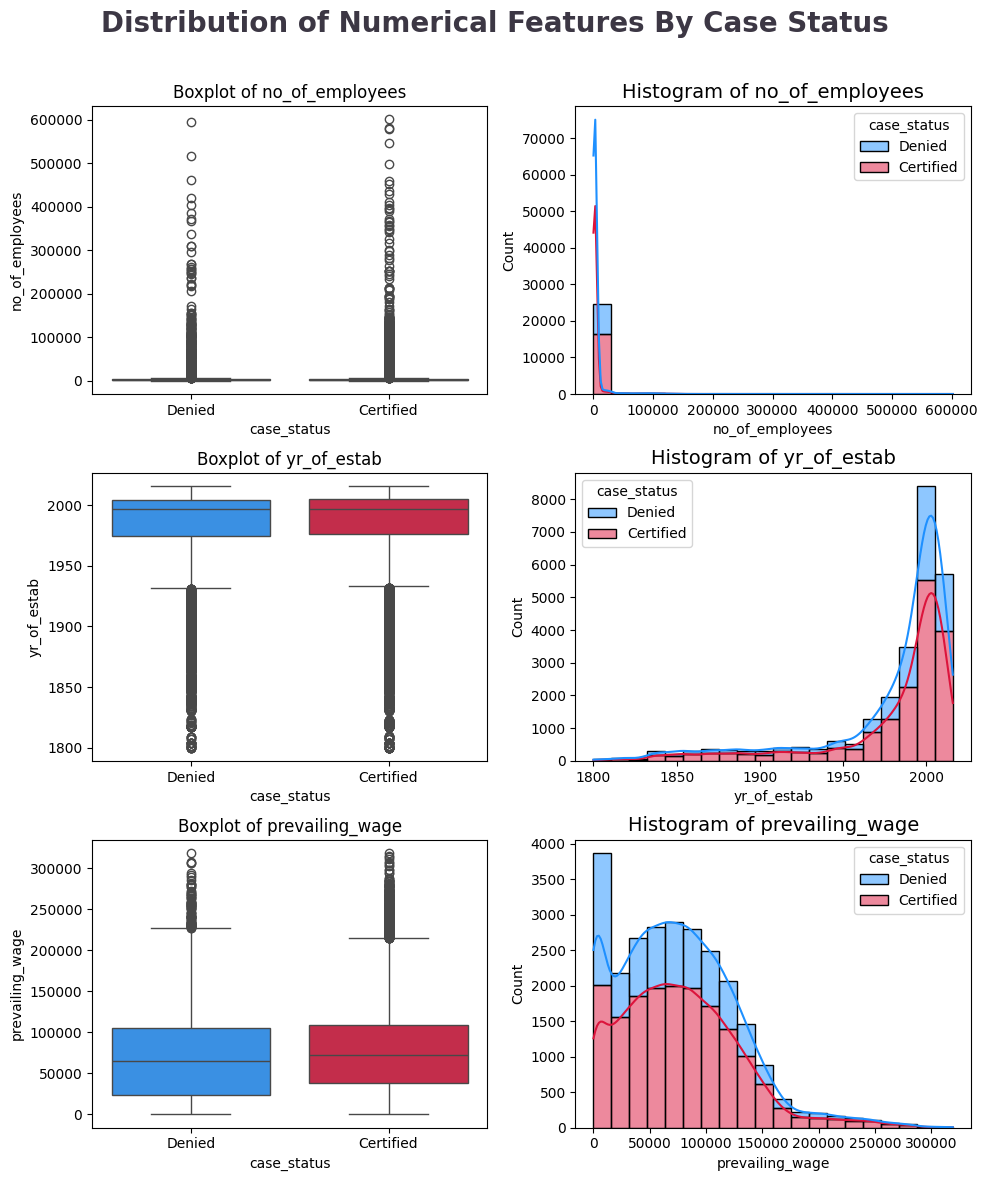

In [22]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

**Initial Analysis Report**

No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.

yr_of_estab is left skewed and some outliers below the lower bound of Box plot.

prevailing_wage is right skewed with outliers above upper bound of box plot.

There are No missing values in the dataset.

The case_id column can be deleted because each row has unique values.

The case_status column is the target to predict.

In the Categorical column, features can be made Binary numerical in feature Encoding.

**4. Visualization**

**4.1 Visualize the Target Feature**

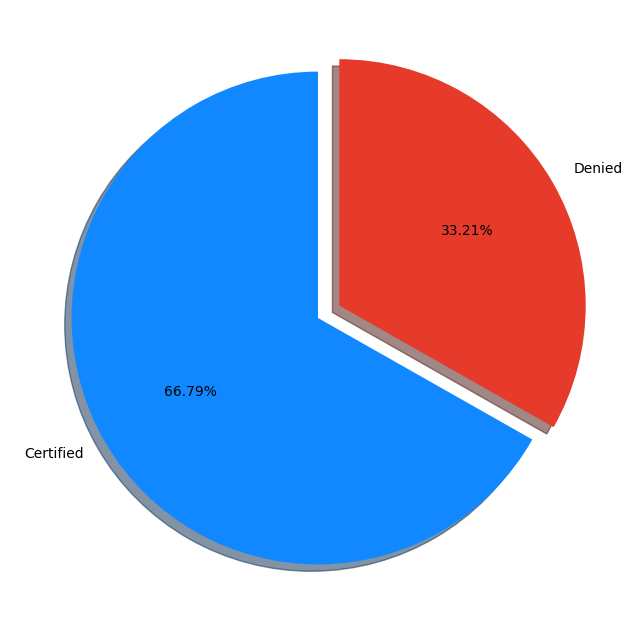

In [23]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

**From the chart it is seen that the Target Variable is Imbalanced**.

**What is imbalanced data? Smart!**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more 

count than the Certified value of the dataset.

Check if applicant Continent has any impact on Visa status ?

In [24]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

Visualise Continent vs Visa Status

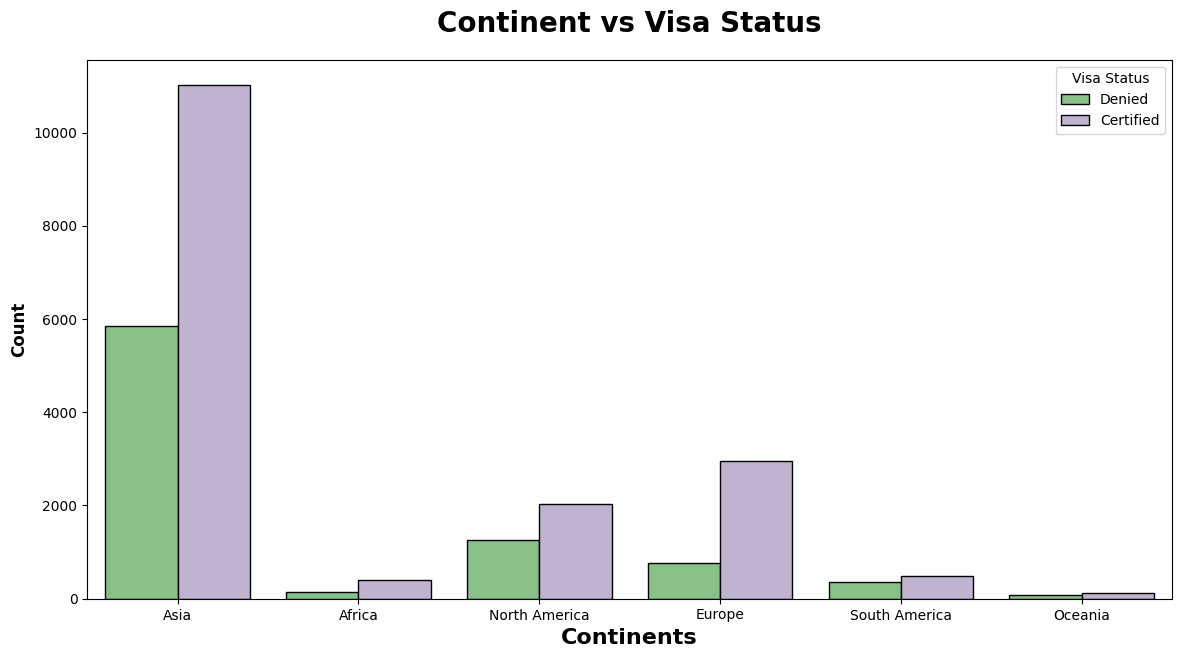

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()